In [1]:
import os
import cv2
import numpy as np
import random
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
class1_folder = './Data/train/fractured'
class2_folder = './Data/train/not fractured'

In [4]:
# Function to load images from a folder
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        if image is not None:
            images.append(image)
    return images


In [5]:
class1_images = load_images_from_folder(class1_folder)
class2_images = load_images_from_folder(class2_folder)

Class 1 sample images:


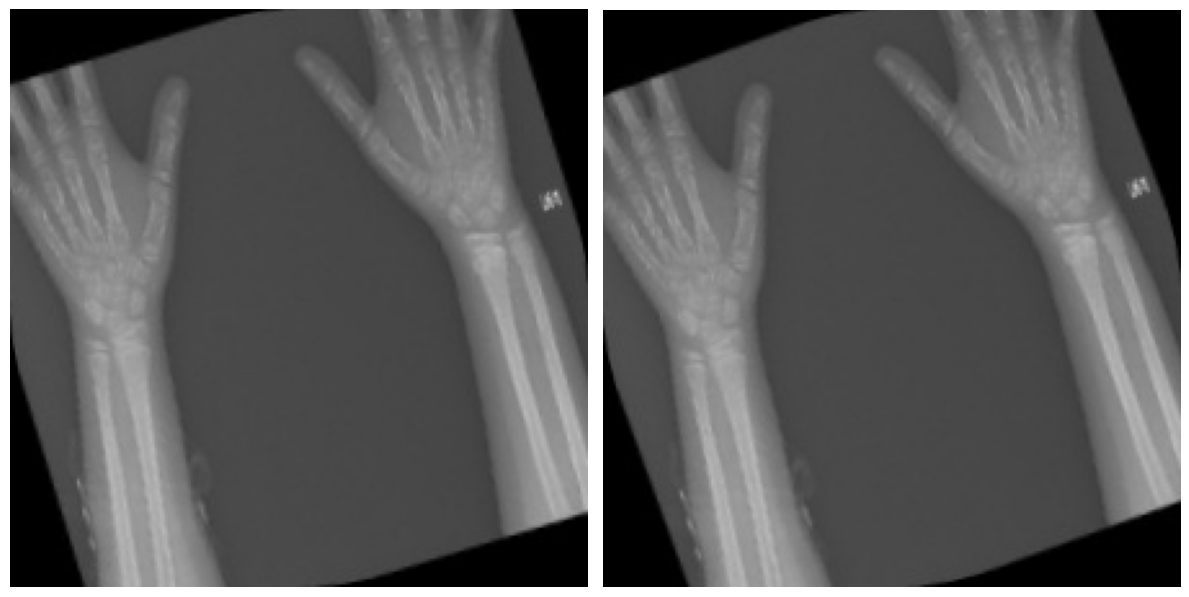


Class 2 sample images:


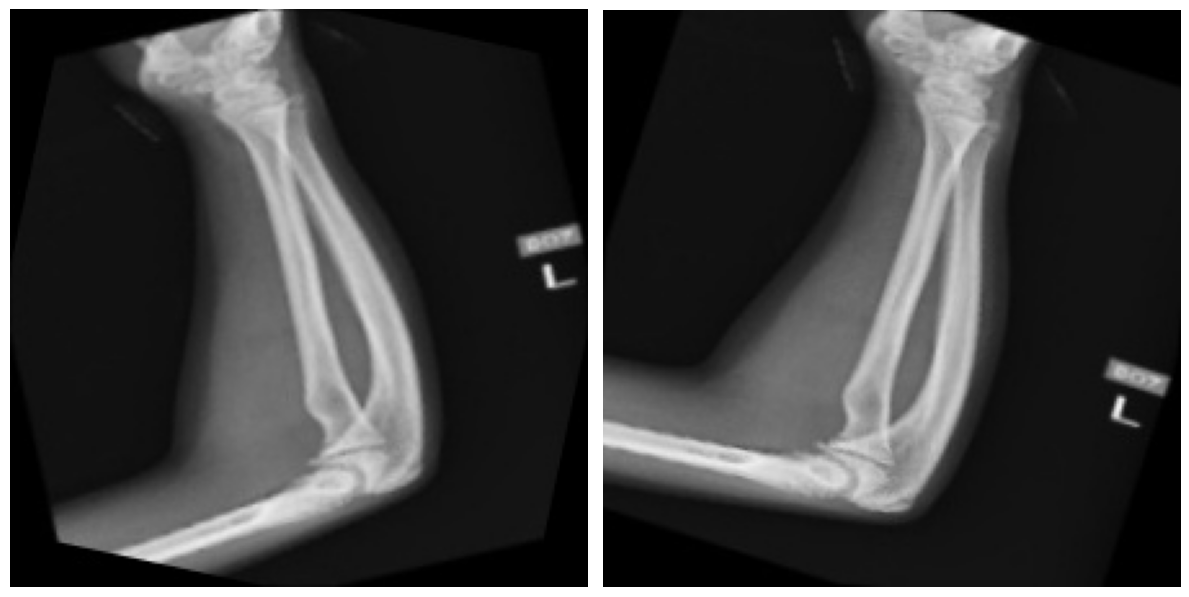

In [6]:
def display_sample_images(images, num_images=2):
    fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=(12, 8))
    
    for i in range(num_images):
        axes[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        axes[i].axis('off')
        
    plt.tight_layout()
    plt.show()

# Display sample images using Matplotlib
print("Class 1 sample images:")
display_sample_images(class1_images)

print("\nClass 2 sample images:")
display_sample_images(class2_images)

In [7]:
# Function to calculate image statistics
def calculate_image_statistics(images):
    image_stats = {
        'mean': [],
        'std': [],
        'min': [],
        'max': []
    }
    for image in images:
        image_stats['mean'].append(np.mean(image))
        image_stats['std'].append(np.std(image))
        image_stats['min'].append(np.min(image))
        image_stats['max'].append(np.max(image))
    
    # Print the statistics
    print("Mean:", np.mean(image_stats['mean']))
    print("Standard Deviation:", np.mean(image_stats['std']))
    print("Minimum Value:", np.mean(image_stats['min']))
    print("Maximum Value:", np.mean(image_stats['max']))

# Calculate image statistics
print("Class 1 image statistics:")
calculate_image_statistics(class1_images)

print("\nClass 2 image statistics:")
calculate_image_statistics(class2_images)

Class 1 image statistics:
Mean: 56.24752360895084
Standard Deviation: 50.658912264179065
Minimum Value: 0.35267857142857145
Maximum Value: 238.17879464285716

Class 2 image statistics:
Mean: 55.105084578416154
Standard Deviation: 50.81137484706714
Minimum Value: 0.16632443531827515
Maximum Value: 233.6559434177504


In [8]:
def apply_edge_detection(image):
    # Apply edge detection algorithm (e.g., Canny edge detection)
    edges = cv2.Canny(image, 100, 200)
    return edges

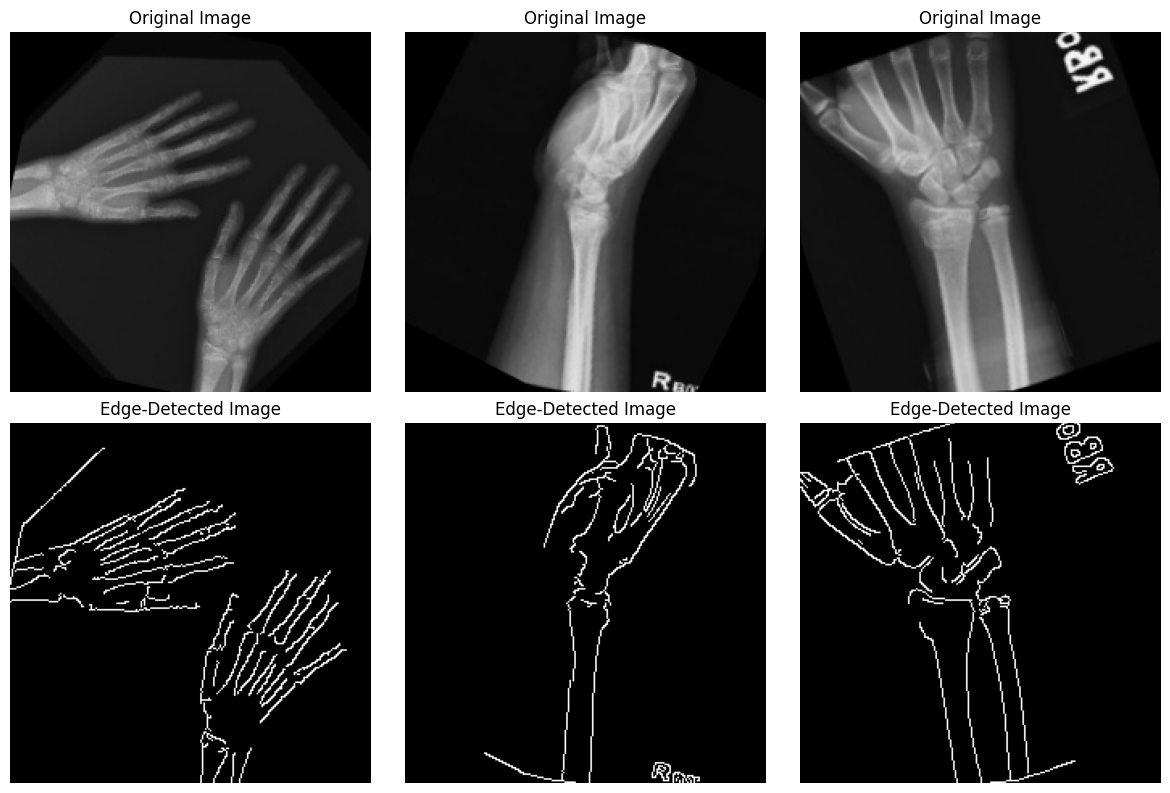

In [9]:
def display_random_images(images, num_images=3):
    random_images = random.sample(images, num_images)
    plt.figure(figsize=(12, 8))
    
    for i, image in enumerate(random_images):
        original_image = image
        
        edge_detected_image = apply_edge_detection(original_image)
        
        plt.subplot(2, num_images, i+1)
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title('Original Image')
        
        plt.subplot(2, num_images, num_images+i+1)
        plt.imshow(edge_detected_image, cmap='gray')
        plt.axis('off')
        plt.title('Edge-Detected Image')
    
    plt.tight_layout()
    plt.show()

# Display random original and edge-detected images
display_random_images(class1_images, num_images=3)

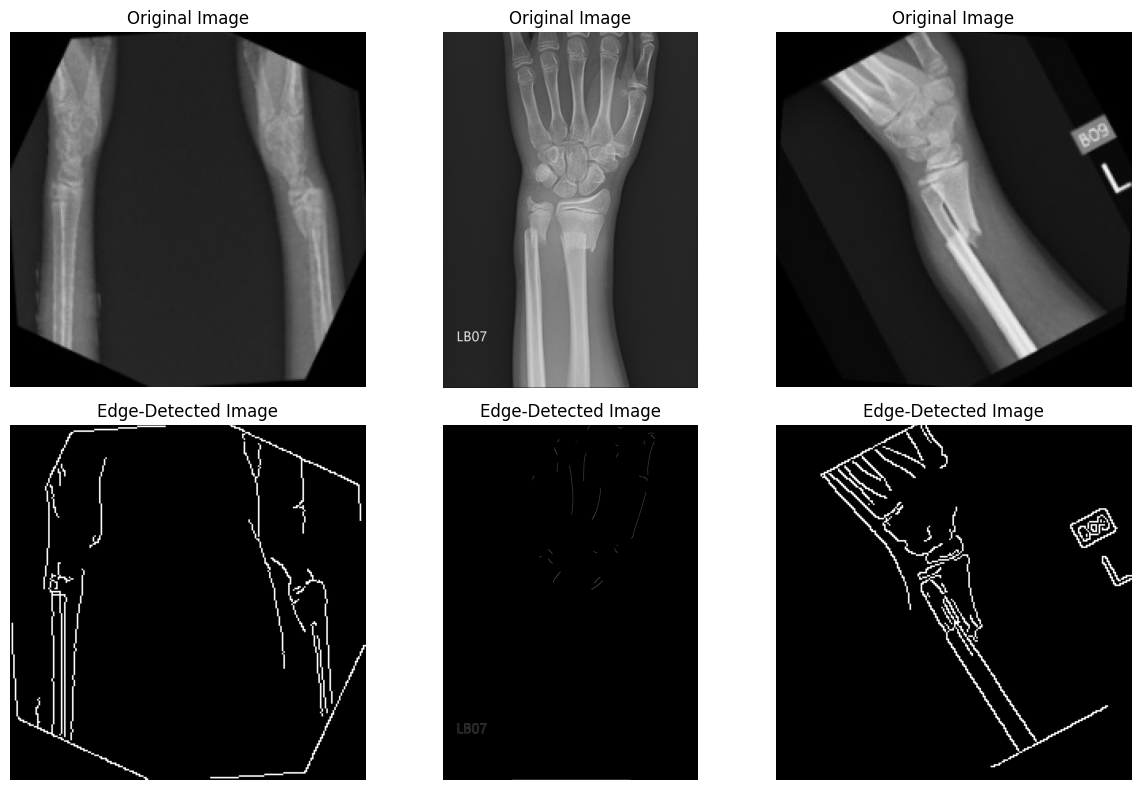

In [10]:
images = class1_images + class2_images

display_random_images(class1_images, num_images=3)


In [11]:

fracture_edges = [apply_edge_detection(image) for image in class1_images]

In [12]:
class1_edges = [apply_edge_detection(image) for image in class1_images]
class2_edges = [apply_edge_detection(image) for image in class2_images]

X = np.array(class1_edges + class2_edges)
y = np.array([1] * len(class1_edges) + [0] * len(class2_edges))

C:\Users\amrit\AppData\Local\Temp\ipykernel_23168\4120274313.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(class1_edges + class2_edges)


In [13]:
def resize_images(images, target_shape):
    resized_images = []
    for image in images:
        resized_image = cv2.resize(image, target_shape, interpolation=cv2.INTER_CUBIC)
        resized_images.append(resized_image)
    return resized_images

In [14]:

# class1_edges = [apply_edge_detection(image) for image in class1_images]
# class2_edges = [apply_edge_detection(image) for image in class2_images]

target_shape = (256, 256)
class1_edges_resized = resize_images(class1_edges, target_shape)
class2_edges_resized = resize_images(class2_edges, target_shape)

In [15]:
X = np.array(class1_edges_resized + class2_edges_resized)
y = np.array([1] * len(class1_edges_resized) + [0] * len(class2_edges_resized))
X = X.reshape(X.shape[0], -1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# model = SVC()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print(accuracy_score(y_test, y_pred))

In [17]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))


Accuracy: 0.8759165256627186
Precision: 0.8807649043869517
Recall: 0.8729096989966555
F1: 0.8768197088465846


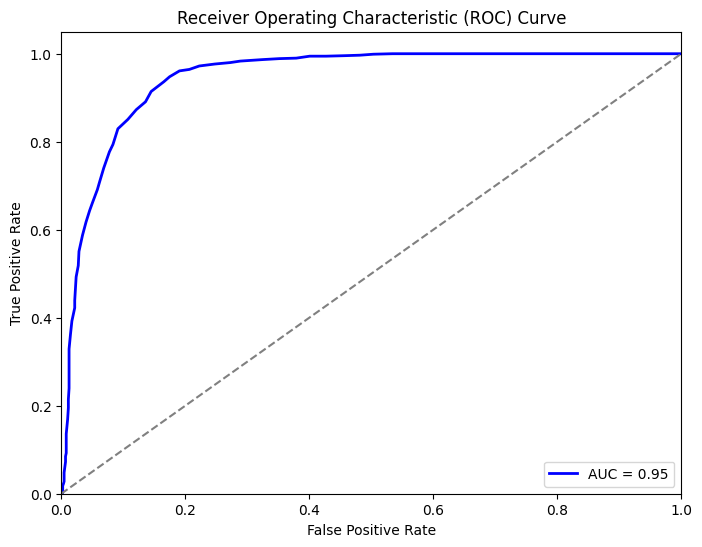

AUC-ROC: 0.9463546677662222


In [19]:

y_pred_prob = model.predict_proba(X_test)[:, 1]  
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC-ROC:", roc_auc)
